## Analysis for SF Ford GoBike: bike ride share program in July 2018

### Import Modules

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in Data

In [2]:
bike_share_201807 = pd.read_csv('201807-fordgobike-tripdata.csv')

### Check Fields of Data

In [3]:
bike_share_201807.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199222 entries, 0 to 199221
Data columns (total 16 columns):
duration_sec               199222 non-null int64
start_time                 199222 non-null object
end_time                   199222 non-null object
start_station_id           196038 non-null float64
start_station_name         196038 non-null object
start_station_latitude     199222 non-null float64
start_station_longitude    199222 non-null float64
end_station_id             196038 non-null float64
end_station_name           196038 non-null object
end_station_latitude       199222 non-null float64
end_station_longitude      199222 non-null float64
bike_id                    199222 non-null int64
user_type                  199222 non-null object
member_birth_year          186793 non-null float64
member_gender              186832 non-null object
bike_share_for_all_trip    199222 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 24.3+ MB


### Subscription VS Temporary Users

#### How many users are subscriped vs temporary users (like tourists) ?

In [4]:
bike_share_201807['user_type'].value_counts()

Subscriber    165243
Customer       33979
Name: user_type, dtype: int64

#### Insight

Majority of riders come from subscribers.

### Rides by Day of Week

Convert start_time to datetime type and create new column called start_time_datetime.

In [6]:
bike_share_201807['start_time_datetime'] = pd.to_datetime(bike_share_201807['start_time'])

Create a new column called start_time_day_name to show day name like Thursday or Friday.

In [7]:
bike_share_201807['start_time_day_name'] = bike_share_201807['start_time_datetime'].dt.weekday_name

Check we only have 7 unique values.

In [8]:
bike_share_201807['start_time_day_name'].unique()

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday',
       'Wednesday'], dtype=object)

Keep records of rides only before July 29th so we have the same number of occurrences for all days of the week.
Let's filter by rides before July 29th and get the total count of rides on each day.

In [47]:
bike_share_201807[bike_share_201807['start_time_datetime'].dt.day< 29].groupby(by='start_time_day_name').size()

start_time_day_name
Friday       28699
Monday       29733
Saturday     17865
Sunday       15459
Thursday     30039
Tuesday      30953
Wednesday    28317
dtype: int64

Sort series values from least to greatest.

In [48]:
bike_share_201807[bike_share_201807['start_time_datetime'].dt.day< 29].groupby(by='start_time_day_name').size(
    ).sort_values()

start_time_day_name
Sunday       15459
Saturday     17865
Wednesday    28317
Friday       28699
Monday       29733
Thursday     30039
Tuesday      30953
dtype: int64

Create bar plot of count of rides by day of week.

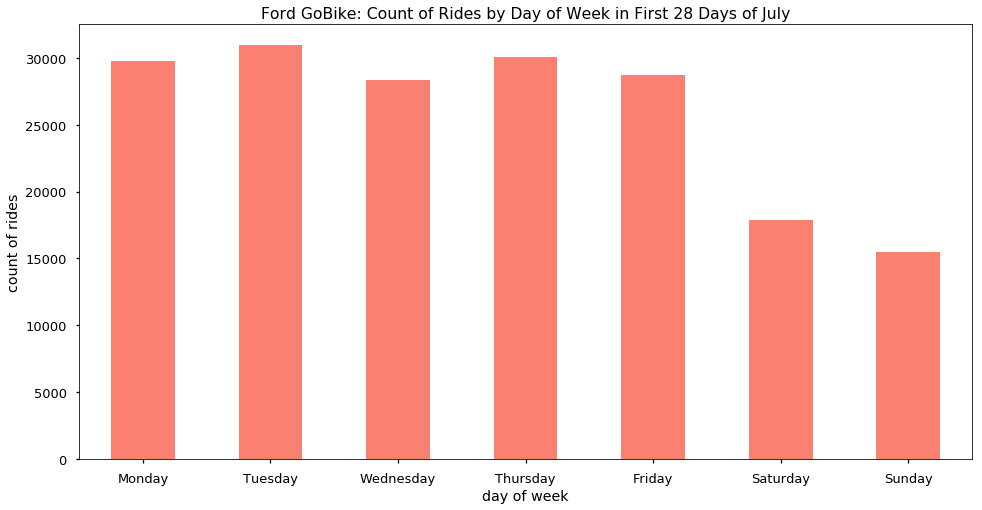

In [85]:
bike_share_201807[bike_share_201807['start_time_datetime'].dt.day < 29].groupby(by='start_time_day_name').size(
    ).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(
    16, 8), color='salmon')
sns.set_context('talk')
plt.xlabel("day of week")
plt.xticks(rotation=0)
plt.ylabel("count of rides")
plt.title("Ford GoBike: Count of Rides by Day of Week in First 28 Days of July");

#### Insights

There's a fairly uniform spread of total rides from Monday-Friday, each with about 29000 rides.

There's a uniform spread of rides on Saturdays and Sundays too. Each day had roughly 16000 rides in July.

### Busiest Dock

After each ride, bikes are docked at a station. I want to get a sense of the most popular stations bikes start at.

In [53]:
bike_share_201807.groupby('start_station_name').size().sort_values(ascending=False).head(10)

start_station_name
San Francisco Ferry Building (Harry Bridges Plaza)           4355
The Embarcadero at Sansome St                                4039
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3849
San Francisco Caltrain (Townsend St at 4th St)               3679
Berry St at 4th St                                           3512
Montgomery St BART Station (Market St at 2nd St)             3349
Market St at 10th St                                         3304
Powell St BART Station (Market St at 4th St)                 3198
Steuart St at Market St                                      3151
2nd St at Townsend St                                        2697
dtype: int64

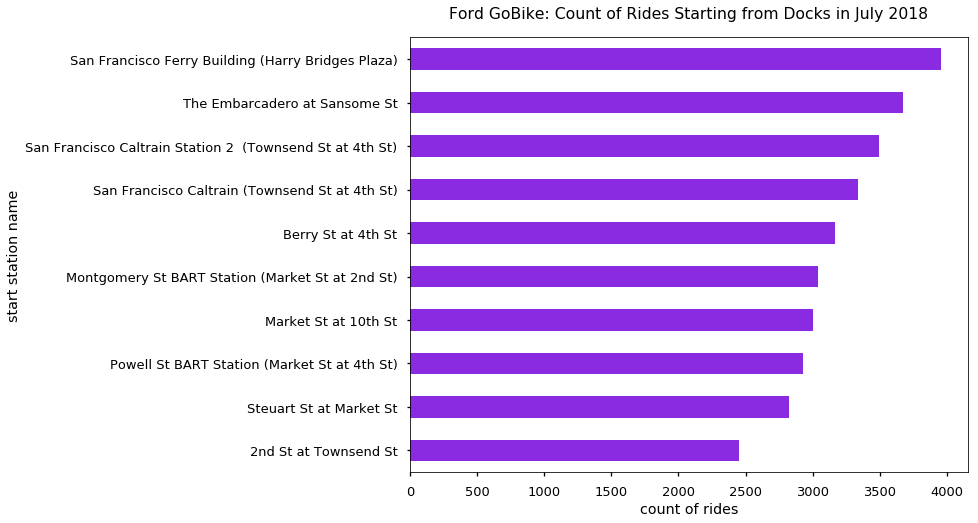

In [82]:
bike_share_201807.groupby('start_station_name').size().sort_values().tail(10).plot(
    kind='barh', color='blueviolet', figsize=(10, 8))                                                                          
plt.xlabel("count of rides")
plt.ylabel("start station name")
plt.title("Ford GoBike: Count of Rides Starting from Docks in July 2018", y = 1.03);

#### Insights

Most rides start from docks located  around BART, Caltrain or popular tourist destinations like the Ferry Building.

### Bike Ride Popularity by Hour of Day

Extract the hour value of the datetime and cast it as new column called start_time_hour.

In [58]:
bike_share_201807['start_time_hour'] = bike_share_201807['start_time_datetime'].dt.hour

Verify there's 24 unique values in start_time_hour - should be 0 to 23.

In [59]:
bike_share_201807['start_time_hour'].unique()

array([18, 17, 21,  9, 19, 15, 22, 23, 20, 16, 11, 12, 14, 13, 10,  8,  6,
        7,  5,  4,  3,  2,  1,  0])

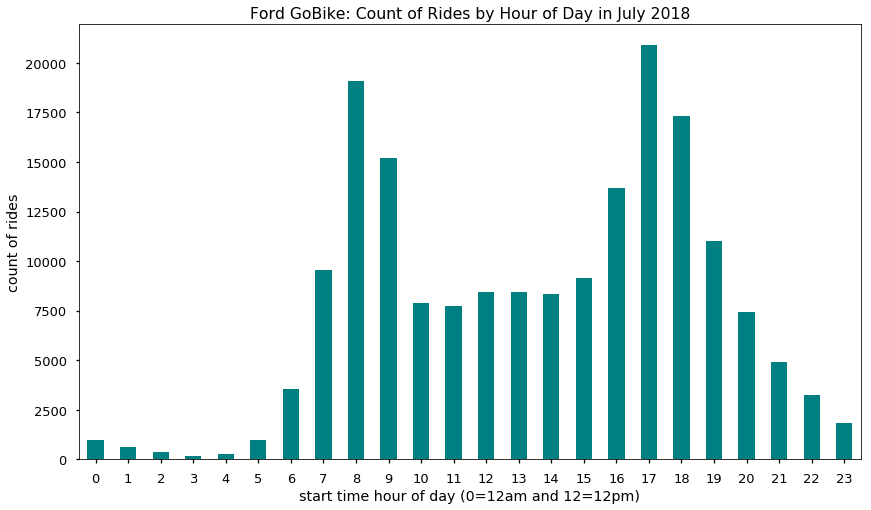

In [87]:
bike_share_201807.groupby('start_time_hour').size().plot(kind='bar', figsize=(14, 8), color='teal')
plt.ylabel("count of rides")
plt.xticks(rotation=0)
plt.xlabel("start time hour of day (0=12am and 12=12pm)")
plt.title("Ford GoBike: Count of Rides by Hour of Day in July 2018");

#### Insights

Most rides take place during standard work commute hours of 7am and 8pm. It's a bimodal distribution.

### Heatmap of Bike Rides by Day of Week and Hour of Day

Heatmaps help reveal patterns of similar values next to one another based on their color.

In [61]:
bike_share_201807[['duration_sec', 'start_time', 'end_time']].head()

,duration_sec,start_time,end_time
0,59989,2018-07-31 18:20:32.7230,2018-08-01 11:00:22.1890
1,60232,2018-07-31 17:24:26.2350,2018-08-01 10:08:18.7520
2,43864,2018-07-31 21:03:26.7030,2018-08-01 09:14:30.8340
3,51522,2018-07-31 18:54:23.7210,2018-08-01 09:13:06.6610
4,83380,2018-07-31 09:22:29.1000,2018-08-01 08:32:09.2700


Convert start_time field into a datetime type with new field name called start_time_datetime

In [62]:
bike_share_201807['start_time_datetime'] = pd.to_datetime(bike_share_201807['start_time'])

Keep records of rides only before July 29th so we have the same number of occurrences for all days of the week.

In [63]:
bike_share_201807 = bike_share_201807[bike_share_201807['start_time_datetime'].dt.day < 29]

Make new column start_time_day_name to be the day name of start of the ride such as Saturday.

In [64]:
bike_share_201807['start_time_day_name'] = bike_share_201807['start_time_datetime'].dt.weekday_name;

/Users/guyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Make new column start_time_hour for the start time hour of rides.

In [65]:
bike_share_201807['start_time_hour'] = bike_share_201807['start_time_datetime'].dt.hour;

/Users/guyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Make new dataframe df_rides_day_hour2 to pivot our data and by day and hour, get the count of rides.

In [66]:
bike_share_201807_rides_day_hour2 = pd.pivot_table(bike_share_201807[['start_time_day_name', 'start_time_hour', 'duration_sec']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='count')

Unstack below puts days on the x-axis and hour of day on the y-axis.

In [67]:
bike_share_201807_rides_day_hour3 = bike_share_201807_rides_day_hour2.unstack(level=0)

Re-index axis so day of week appears in logical progression.

In [88]:
bike_share_201807_rides_day_hour3 = bike_share_201807_rides_day_hour3.reindex_axis(labels=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1);

/Users/guyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


Create new axis tick labels for easy to read hours and days of the week.

In [69]:
morning_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "am"
    morning_hours.append(detailed_hour)

In [70]:
afternoon_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "pm"
    afternoon_hours.append(detailed_hour)

In [71]:
detailed_hours = ["12am"] + morning_hours + ["12pm"] + afternoon_hours

In [72]:
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

### Plot Heatmap of Ride Counts by Day and Hour of Day

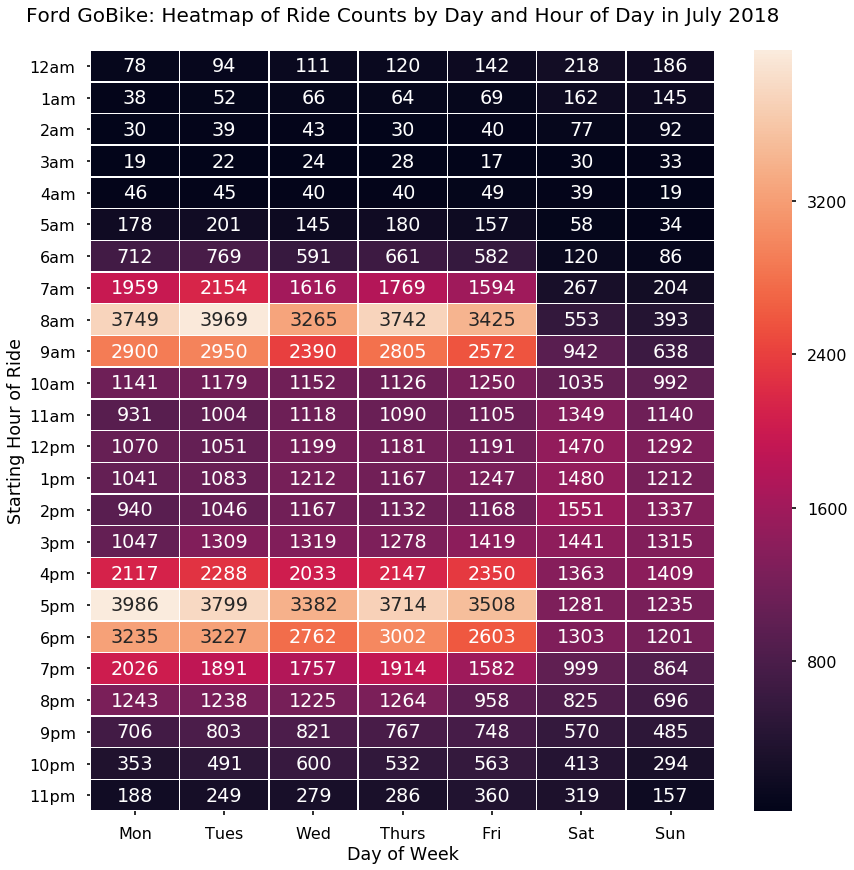

In [90]:
sns.set_context("poster")
f, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(bike_share_201807_rides_day_hour3, annot=True, fmt="d", linewidths=.5, ax=ax,
                 xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Ford GoBike: Heatmap of Ride Counts by Day and Hour of Day in July 2018", fontsize=20, y=1.03)
ax.set(xlabel='Day of Week', ylabel='Starting Hour of Ride');

#### Interpretation of Heat Map of Rides

On weekdays, Monday to Friday, most rides are taken during typical commuting hours, from 7am to 9am and 4pm - 7pm.

On weekends, there's fairly consistent amount of rides per hour from 11am - 6pm.